# Predict sign of next day stock return 

Based on MLP

In [28]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.api as sm
from sklearn.preprocessing import MinMaxScaler

## Classification Task 
Positive Return equals class +1. 
Negative Return equals class -1.

In [67]:
# read in data
dataset = pd.read_csv("../final_data/complete_data.csv")
dataset = dataset.drop(['Unnamed: 0', 'Timestamp'], 1)
dataset.tail()

,ID,articleCount,avgSentiment,stdSentiment,25quantileSentiment,50quantileSentiment,75quantileSentiment,maxSentiment,minSentiment,Previous_Day_Return,Next_Day_Return
105,Tesla,297,0.065692,0.231960,-0.087833,0.05566,0.197360,0.747933,-0.64050,-0.006795,-0.027506
106,Airbus,261,-0.002624,0.262978,-0.179820,0.00000,0.162960,0.605420,-0.54918,0.021861,-0.000714
107,Allianz,195,-0.048640,0.281950,-0.290885,-0.06882,0.127410,0.565740,-0.58092,0.012064,-0.001565
108,Telefonica,115,0.088121,0.226507,-0.020130,0.07377,0.235167,0.622090,-0.56565,-0.026461,-0.036134
109,Samsung,634,0.096998,0.206897,0.000000,0.07874,0.233280,0.636900,-0.89410,-0.009068,0.002022


In [79]:
companies = dataset.ID.unique()
companies

array(['BASF', 'Tesla', 'Google', 'Allianz', 'Airbus', 'Apple', 'Bayer',
       'Telefonica', 'Samsung', 'BMW'], dtype=object)

## Feature
Definition of the Input-Vector

## Target Var
Definition of the Target-Variable.

In [68]:
# define feature list 
features = ['articleCount', 'avgSentiment','stdSentiment',
            '25quantileSentiment', '50quantileSentiment', '75quantileSentiment',
            'maxSentiment', 'minSentiment', 'Previous_Day_Return']

# define target variable 
target_var = ['Next_Day_Return']

# define input vector
X_train = dataset[features]
X_train.head()

# define output vector
Y_train = dataset[target_var]
Y_train.head()

,Next_Day_Return
0,-0.017219
1,-0.057051
2,-0.017464
3,-0.009181
4,0.000612


## Heatmap

Visualize the correlation between each feature and the target variable.

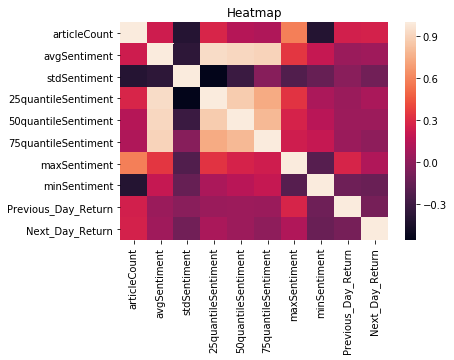

In [71]:
corr = dataset[features+target_var].corr()
plt.figure()
plt.title('Heatmap')
sns.heatmap(corr,
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)
plt.show()


## Normalize Data
Normalize Series Data that all values are between 0-1.
Not perfect yet, because min and max value of a variable are never the same. 

In [72]:
scaler = MinMaxScaler(feature_range=(0, 1))
rescaled = scaler.fit_transform(dataset[features+target_var])
print(rescaled)

[[0.02836041 0.83421902 0.39973429 ... 0.46381277 0.67922097 0.41694011]
 [0.13293944 0.5549748  0.07135845 ... 0.62850158 0.60974108 0.        ]
 [0.54387001 0.6414192  0.17260281 ... 0.56399613 0.82535316 0.41437463]
 ...
 [0.03988183 0.28382103 0.63616628 ... 0.52928593 0.68923429 0.58079259]
 [0.01624815 0.59923015 0.34724823 ... 0.54872925 0.30505455 0.21894734]
 [0.16957164 0.61970228 0.24505647 ... 0.1305134  0.47849831 0.61834558]]


In [78]:
dataset.loc[:, features+target_var] = rescaled
dataset.head()

,ID,articleCount,avgSentiment,stdSentiment,25quantileSentiment,50quantileSentiment,75quantileSentiment,maxSentiment,minSentiment,Previous_Day_Return,Next_Day_Return
0,BASF,0.028360,0.834219,0.399734,0.868749,0.950648,0.722098,0.331038,0.463813,0.679221,0.416940
1,Tesla,0.132939,0.554975,0.071358,0.544282,0.646167,0.452159,0.317922,0.628502,0.609741,0.000000
2,Google,0.543870,0.641419,0.172603,0.655529,0.640720,0.554017,0.979494,0.563996,0.825353,0.414375
3,Allianz,0.018021,0.275461,0.545952,0.271544,0.335559,0.205261,0.194943,0.424812,0.704044,0.501073
4,Airbus,0.056130,0.523599,0.369133,0.640021,0.568557,0.436291,0.234427,0.536913,0.643451,0.603581


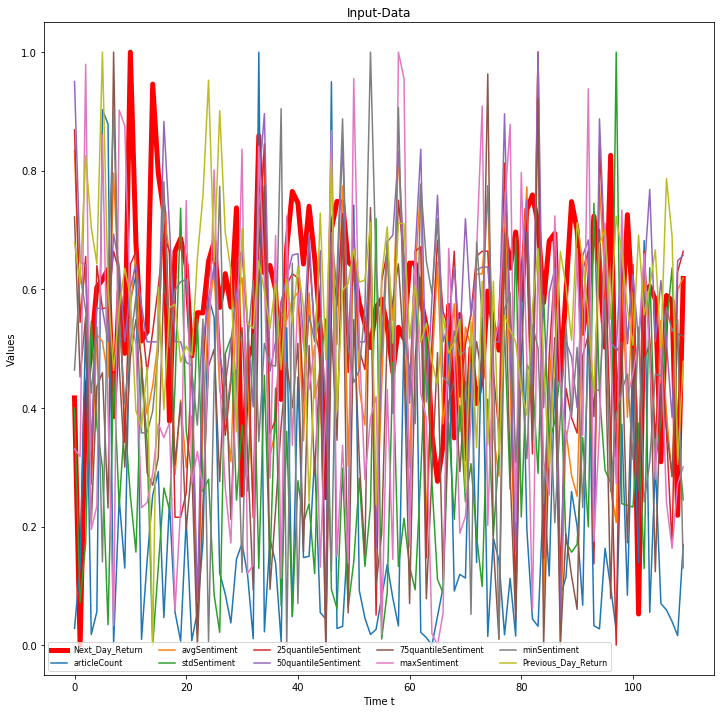

In [84]:
plt.figure(figsize=(12, 12))
plt.title('Input-Data')
plt.plot(dataset['Next_Day_Return'], label='Next_Day_Return', color='r', linewidth=5.0)
for feature in features:
    plt.plot(dataset[feature], label=feature)
plt.xlabel('Time t')
plt.ylabel('Values')
plt.legend(loc='lower left',
           ncol=5,
           fontsize=8)
plt.show()


## OLS Linear Relationship 
OLS

In [95]:
# amount of statistic variables
dim = 5
lin_rel = np.zeros([len(features), dim])

for i in range(len(features)):
    results = sm.OLS(dataset[target_var], sm.add_constant(dataset[features[i]])).fit()
    lin_rel[i,0] = results.params[0]
    lin_rel[i,1] = results.params[1]
    lin_rel[i,2] = results.pvalues[0]
    lin_rel[i,3] = results.pvalues[1]
    lin_rel[i,4] = results.rsquared

print("COMPANY: %s " %companies[i])
print("# --  Next-Day Return and avgSentiment --- ")
print("ß0 ", lin_rel[0])
print("ß1 ", lin_rel[1])
print("t-value ", lin_rel[2])
print("r^2 ", lin_rel[3])
print("# ------------------------------------------")


COMPANY: Samsung 
# --  Next-Day Return and avgSentiment --- 
ß0  [5.35127422e-01 1.74668825e-01 3.67751384e-50 6.21259344e-03
 6.72791220e-02]
ß1  [5.47887960e-01 4.83985672e-02 1.08711985e-24 5.35579788e-01
 3.56376653e-03]
t-value  [ 5.98446619e-01 -8.79800729e-02  1.22634094e-38  2.88936042e-01
  1.04064565e-02]
r^2  [5.30183276e-01 8.02776627e-02 1.43444573e-22 3.02193371e-01
 9.85322235e-03]
# ------------------------------------------


## Correlation and Covariance

In [105]:
for feature in features:
    print(dataset[feature])
    

0      0.028360
1      0.132939
2      0.543870
3      0.018021
4      0.056130
5      0.902806
6      0.878877
7      0.002068
8      0.246972
9      0.129985
10     0.581093
11     0.623929
12     0.009749
13     0.142393
14     0.252880
15     0.292762
16     0.046381
17     0.240473
18     0.055539
19     0.006795
20     0.210931
21     0.007681
22     0.056130
23     0.174298
24     0.587592
25     0.552437
26     0.121713
27     0.085968
28     0.037518
29     0.145052
         ...   
80     0.629838
81     0.194978
82     0.044018
83     0.031905
84     0.262334
85     0.116691
86     0.450517
87     0.083013
88     0.114328
89     0.259084
90     0.200295
91     0.067356
92     0.564254
93     0.032792
94     0.027474
95     0.163368
96     0.097784
97     0.025406
98     0.372526
99     0.084195
100    0.441950
101    0.138848
102    0.682127
103    0.055244
104    0.305170
105    0.070015
106    0.059380
107    0.039882
108    0.016248
109    0.169572
Name: articleCount, Leng

In [99]:
dataset[feature]
for feature in features:
    cov = np.cov(np.matrix(dataset[target_var]), np.matrix(dataset[feature]))
    corr = np.corrcoef(np.matrix(dataset[target_var]), np.matrix(dataset[feature]))
    print("# -- Next-Day Return and %s --- " %feature)
    print("Covariance: \n", cov)
    print("Correlation: \n", corr)
    print("# ------------------------------------------")


ValueError: all the input array dimensions except for the concatenation axis must match exactly

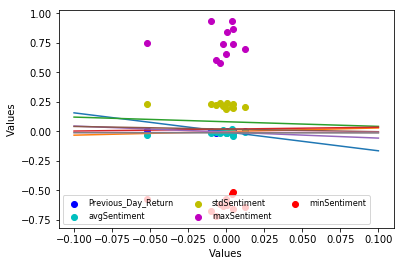

In [19]:
    X_plot = np.linspace(-0.1, 0.1, 100)
    colors = ['b', 'c', 'y', 'm', 'r']

    plt.figure()
    plt_pdR = plt.scatter(Y_train['Next_Day_Return'], X_train['Previous_Day_Return'], color=colors[0])
    plt.plot(X_plot, X_plot * results_Previous_Day_Return.params[1] + results_Previous_Day_Return.params[0])
    plt.plot(X_plot, X_plot * results_avgSentiment.params[1] + results_avgSentiment.params[0])
    plt.plot(X_plot, X_plot * results_stdSentiment.params[1] + results_stdSentiment.params[0])
    plt.plot(X_plot, X_plot * results_25quantileSentiment.params[1] + results_25quantileSentiment.params[0])
    plt.plot(X_plot, X_plot * results_50quantileSentiment.params[1] + results_50quantileSentiment.params[0])
    plt.plot(X_plot, X_plot * results_75quantileSentiment.params[1] + results_75quantileSentiment.params[0])
    plt.plot(X_plot, X_plot * results_maxSentiment.params[1] + results_maxSentiment.params[0])
    plt.plot(X_plot, X_plot * results_minSentiment.params[1] + results_minSentiment.params[0])
    plt_avgS = plt.scatter(Y_train['Next_Day_Return'], X_train['avgSentiment'], color=colors[1])
    plt_stdS = plt.scatter(Y_train['Next_Day_Return'], X_train['stdSentiment'], color=colors[2])
    plt_maxS = plt.scatter(Y_train['Next_Day_Return'], X_train['maxSentiment'], color=colors[3])
    plt_minS = plt.scatter(Y_train['Next_Day_Return'], X_train['minSentiment'], color=colors[4])
    plt.xlabel('Values')
    plt.ylabel('Values')
    plt.legend((plt_pdR, plt_avgS, plt_stdS, plt_maxS, plt_minS),
               ('Previous_Day_Return', 'avgSentiment', 'stdSentiment', 'maxSentiment', 'minSentiment'),
               scatterpoints=1,
               loc='lower left',
               ncol=3,
               fontsize=8)

    plt.show()


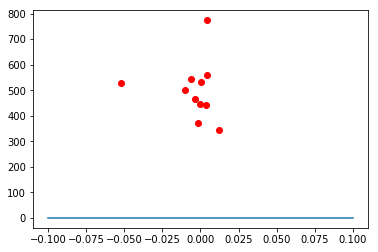

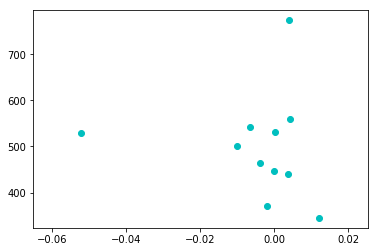

In [20]:
    # separate scatter plot for article count, otherwise y-axis scale is too inaccurate
    plt.figure()
    plt.plot(X_plot, X_plot * results_articleCount.params[1] + results_articleCount.params[0])
    plt_artC = plt.scatter(Y_train['Next_Day_Return'], X_train['articleCount'], color='r')
    plt.show()

    plt.figure()
    plt.scatter(Y_train['Next_Day_Return'], X_train['articleCount'], color=colors[1])
    plt.show()

    plt.plot(X_train['articleCount'], label='AVG Sentiment')